Instruction: before running the code, it is needed to load into Colab the .txt file and the .py metrics files.

Reading of the Divina Commedia .txt file

In [1]:
with open('COMMEDIA_SYLLNEW.txt','r') as f:
#with open('inferno_syllnew.txt','r') as f:
  divine_comedy = f.read()

print(divine_comedy[:250])
print('\n\n[...]\n\n')
print(divine_comedy[-280:])

Inferno • Canto I


  1 |Nel |mez|zo |del |cam|min |di |no|stra |vi|ta             
  2 |mi |ri|tro|vai |per |u|na |sel|va o|scu|ra,               
  3 |ché |la |di|rit|ta |via |e|ra |smar|ri|ta.                

  4 |Ahi |quan|to a |dir |qual |e|ra 


[...]


ia |ven|ne.          

142 |A |l’ al|ta |fan|ta|sia |qui |man|cò |pos|sa;             
143 |ma |già |vol|ge|va il |mio |di|sio |e ’l |vel|le,         
144 |sì |co|me |ro|ta |ch’ i|gual|men|te è |mos|sa,            

145 |l’ a|mor |che |mo|ve il |so|le e |l’ al|tre |stel|le.     



## Text preprocessing

In [2]:
import re

divine_comedy = divine_comedy.replace("ä", "a")
divine_comedy = divine_comedy.replace("é", "è")
divine_comedy = divine_comedy.replace("ë", "è")
divine_comedy = divine_comedy.replace("Ë", "E")
divine_comedy = divine_comedy.replace("ï", "i")
divine_comedy = divine_comedy.replace("Ï", "I")
divine_comedy = divine_comedy.replace("ó", "ò")
divine_comedy = divine_comedy.replace("ö", "o")
divine_comedy = divine_comedy.replace("ü", "u")
divine_comedy = divine_comedy.replace("(", "-")
divine_comedy = divine_comedy.replace(")", "-")
divine_comedy = divine_comedy.replace("[", "")
divine_comedy = divine_comedy.replace("]", "")
divine_comedy = re.sub(r'[0-9]+', '', divine_comedy)

In [3]:
def _strip_punctuaction(str):
    return re.sub(r"""[,.;:"“”!?«»—'`’]+""", "", str)


divine_comedy2 = re.sub('\n\n\n','\n\n',divine_comedy)
divine_comedy2 = _strip_punctuaction(divine_comedy2.lower())
divine_comedy_lines = divine_comedy2.split('\n')
print(divine_comedy_lines[0:10])
my_data = []
for el in divine_comedy_lines:
    el2 = el.strip()
    el3 = el2.split('|')[1:]
    if el3 != []:
       my_data.append(el3)
    else:
       my_data.append(['=end_terzine='])

['inferno • canto i', '', '   |nel |mez|zo |del |cam|min |di |no|stra |vi|ta             ', '   |mi |ri|tro|vai |per |u|na |sel|va o|scu|ra               ', '   |chè |la |di|rit|ta |via |e|ra |smar|ri|ta                ', '', '   |ahi |quan|to a |dir |qual |e|ra è |co|sa |du|ra           ', '   |e|sta |sel|va |sel|vag|gia e |a|spra e |for|te            ', '   |che |nel |pen|sier |ri|no|va |la |pa|u|ra                ', '']


In [4]:
import copy
my_data2 = copy.deepcopy(my_data)

def extract_spaces(list):
    test = []
    for el in list:
      if el[-1]==' ':
        test.append(str(el[:-1]))
        test.append(' ')
      else:
        test.append(el)
    return test


for i in range(len(my_data)):
  my_data2[i] = extract_spaces(my_data[i])

for i in range(5):
  print(my_data2[i])

['=end_terzine=']
['=end_terzine=']
['nel', ' ', 'mez', 'zo', ' ', 'del', ' ', 'cam', 'min', ' ', 'di', ' ', 'no', 'stra', ' ', 'vi', 'ta']
['mi', ' ', 'ri', 'tro', 'vai', ' ', 'per', ' ', 'u', 'na', ' ', 'sel', 'va o', 'scu', 'ra']
['chè', ' ', 'la', ' ', 'di', 'rit', 'ta', ' ', 'via', ' ', 'e', 'ra', ' ', 'smar', 'ri', 'ta']


In [5]:
my_data2_5 = []
flag = 0

my_data2.reverse()

for el in my_data2:

  if flag == 0:
    my_data2_5.append(el)
    if el == ['=end_terzine=']:
      flag = 1

  elif flag == 1:
    if el == ['=end_terzine=']:
      flag = 2
    else:
      flag = 0
      my_data2_5.append(el)

  elif flag == 2: 
     if el == ['=end_terzine=']:
       flag = 2
     else:
       flag = 4

  elif flag == 4:
     flag = 0  


my_data2.reverse()
my_data2_5.reverse()

for i in range(5):
  print(my_data2_5[i])

['=end_terzine=']
['nel', ' ', 'mez', 'zo', ' ', 'del', ' ', 'cam', 'min', ' ', 'di', ' ', 'no', 'stra', ' ', 'vi', 'ta']
['mi', ' ', 'ri', 'tro', 'vai', ' ', 'per', ' ', 'u', 'na', ' ', 'sel', 'va o', 'scu', 'ra']
['chè', ' ', 'la', ' ', 'di', 'rit', 'ta', ' ', 'via', ' ', 'e', 'ra', ' ', 'smar', 'ri', 'ta']
['=end_terzine=']


In [6]:
##############

def string_split(string):
  string_rev = string[::-1]
  #print(string_rev)

  counter = 0
  pos_split = 0

  for i in range(len(string_rev)):
    #print(string_rev[i])
    #print(string_rev[i] in 'aeiou')
    if string_rev[i] in 'aeiou':
      counter += 1
      if counter == 2:
        pos_split = len(string)-1-i
        return pos_split 

  return pos_split 



###################




def convert_3char_last(lista):
  if len(lista)==1:
    return lista

  lista_old = lista[:-2]
  ult = lista[-1]
  penult = lista[-2]


  stringa = penult+ult
  #print(stringa)

  pos = string_split(stringa)
  #print(pos)


  penult_new = stringa[:pos]
  ult_new = stringa[pos:]
  #print(stringa)
  #print(ult_new)
  
  if penult_new != '':
    lista_old.append(penult_new)
  lista_old.append(ult_new)
  

  return lista_old

###################
def syll_trasform(syl1,syl2):

  penult_new = '' 
  ult_new = ''


  syl1_rev = syl1[::-1]
  switch = 0
  for i in range(len(syl1_rev)):
    if switch == 0:

      if syl1_rev[i] in 'aeiou':
        ult_new += syl1_rev[i]
        switch = 1
      else:
        ult_new += syl1_rev[i]

    else:

      penult_new += syl1_rev[i]









  return penult_new[::-1], ult_new[::-1]+syl2

###################
def convert_3char_last_fixed(lista):
  if len(lista)==1:
    return lista

  lista_old = lista[:-2]
  ult = lista[-1]
  penult = lista[-2]

  penult_new, ult_new = syll_trasform(penult,ult)
  #print(stringa)
  #print(ult_new)
  
  if penult_new != '':
    lista_old.append(penult_new)
  lista_old.append(ult_new)
  

  return lista_old


###################
for i in range(5):
  print(convert_3char_last_fixed(my_data2_5[i]))

['=end_terzine=']
['nel', ' ', 'mez', 'zo', ' ', 'del', ' ', 'cam', 'min', ' ', 'di', ' ', 'no', 'stra', ' ', 'v', 'ita']
['mi', ' ', 'ri', 'tro', 'vai', ' ', 'per', ' ', 'u', 'na', ' ', 'sel', 'va o', 'sc', 'ura']
['chè', ' ', 'la', ' ', 'di', 'rit', 'ta', ' ', 'via', ' ', 'e', 'ra', ' ', 'smar', 'r', 'ita']
['=end_terzine=']


In [7]:
my_data2_6 = []
for i in range(len(my_data2_5)-1):
#for i in range(6):
  #print(convert_3char_last(my_data[i]))
  my_data2_6.append(convert_3char_last_fixed(my_data2_5[i]))

In [8]:
def reverse(list): 
    return [ele for ele in reversed(list)] 

my_data2_7 = []
for i in range(len(my_data2_6)):
  my_data2_7.append(reverse(my_data2_6[i]))

for i in range(4):
  print(my_data2_7[i])

['=end_terzine=']
['ita', 'v', ' ', 'stra', 'no', ' ', 'di', ' ', 'min', 'cam', ' ', 'del', ' ', 'zo', 'mez', ' ', 'nel']
['ura', 'sc', 'va o', 'sel', ' ', 'na', 'u', ' ', 'per', ' ', 'vai', 'tro', 'ri', ' ', 'mi']
['ita', 'r', 'smar', ' ', 'ra', 'e', ' ', 'via', ' ', 'ta', 'rit', 'di', ' ', 'la', ' ', 'chè']


In [9]:
my_data3 = copy.deepcopy(my_data2_7)
#my_data3 = copy.deepcopy(my_data2_5)


for i in range(len(my_data3)):
  if len(my_data3[i]) > 1:
    my_data3[i].insert(0, ' -start- ')
    #my_data3[i].insert(0, ' -end- ')
    my_data3[i].append(' -end- ')
    #my_data3[i].append(' -start- ')
    my_data3[i].append('\n')
    
  else:
    my_data3[i].append('\n')

for i in range(12):
  print(my_data3[i])

one_list_data = [item for sublist in my_data3 for item in sublist]
one_list_tokenized = [item for sublist in my_data3 for item in sublist]

['=end_terzine=', '\n']
[' -start- ', 'ita', 'v', ' ', 'stra', 'no', ' ', 'di', ' ', 'min', 'cam', ' ', 'del', ' ', 'zo', 'mez', ' ', 'nel', ' -end- ', '\n']
[' -start- ', 'ura', 'sc', 'va o', 'sel', ' ', 'na', 'u', ' ', 'per', ' ', 'vai', 'tro', 'ri', ' ', 'mi', ' -end- ', '\n']
[' -start- ', 'ita', 'r', 'smar', ' ', 'ra', 'e', ' ', 'via', ' ', 'ta', 'rit', 'di', ' ', 'la', ' ', 'chè', ' -end- ', '\n']
['=end_terzine=', '\n']
[' -start- ', 'ura', 'd', ' ', 'sa', 'co', ' ', 'ra è', 'e', ' ', 'qual', ' ', 'dir', ' ', 'to a', 'quan', ' ', 'ahi', ' -end- ', '\n']
[' -start- ', 'orte', 'f', ' ', 'spra e', 'a', ' ', 'gia e', 'vag', 'sel', ' ', 'va', 'sel', ' ', 'sta', 'e', ' -end- ', '\n']
[' -start- ', 'ura', 'pa', ' ', 'la', ' ', 'va', 'no', 'ri', ' ', 'sier', 'pen', ' ', 'nel', ' ', 'che', ' -end- ', '\n']
['=end_terzine=', '\n']
[' -start- ', 'orte', 'm', ' ', 'più', ' ', 'co è', 'po', ' ', 'che', ' ', 'ra', 'ma', 'a', ' ', 't è', 'tan', ' -end- ', '\n']
[' -start- ', 'ovai', 'tr', ' ',

In [10]:
print(one_list_data[1:100])
print(repr(one_list_data[-1]))

['\n', ' -start- ', 'ita', 'v', ' ', 'stra', 'no', ' ', 'di', ' ', 'min', 'cam', ' ', 'del', ' ', 'zo', 'mez', ' ', 'nel', ' -end- ', '\n', ' -start- ', 'ura', 'sc', 'va o', 'sel', ' ', 'na', 'u', ' ', 'per', ' ', 'vai', 'tro', 'ri', ' ', 'mi', ' -end- ', '\n', ' -start- ', 'ita', 'r', 'smar', ' ', 'ra', 'e', ' ', 'via', ' ', 'ta', 'rit', 'di', ' ', 'la', ' ', 'chè', ' -end- ', '\n', '=end_terzine=', '\n', ' -start- ', 'ura', 'd', ' ', 'sa', 'co', ' ', 'ra è', 'e', ' ', 'qual', ' ', 'dir', ' ', 'to a', 'quan', ' ', 'ahi', ' -end- ', '\n', ' -start- ', 'orte', 'f', ' ', 'spra e', 'a', ' ', 'gia e', 'vag', 'sel', ' ', 'va', 'sel', ' ', 'sta', 'e', ' -end- ', '\n', ' -start- ']
'\n'


part 2

In [11]:
vocab = sorted(set(one_list_data))

syl2idx = {u:i for i, u in enumerate(vocab)}
idx2syl = {i:u for i, u in enumerate(vocab)}

print(syl2idx)
print(idx2syl)

{'\n': 0, ' ': 1, ' -end- ': 2, ' -start- ': 3, ' bei': 4, ' bue': 5, ' bui': 6, ' ch io': 7, ' ci ha': 8, ' co': 9, ' cria': 10, ' cui': 11, ' dea': 12, ' dee': 13, ' dei': 14, ' deo': 15, ' dia': 16, ' die': 17, ' dii': 18, ' dio': 19, ' due': 20, ' dèi': 21, ' dì': 22, ' fai': 23, ' fei': 24, ' feo': 25, ' fie': 26, ' fio': 27, ' frui': 28, ' fu': 29, ' fue': 30, ' fui': 31, ' fè': 32, ' fèe': 33, ' gia': 34, ' gio': 35, ' gioi': 36, ' giùe': 37, ' guai': 38, ' gì': 39, ' hai': 40, ' io': 41, ' la': 42, ' lai': 43, ' lei': 44, ' li': 45, ' lo': 46, ' lui': 47, ' lì': 48, ' mai': 49, ' me': 50, ' mea': 51, ' mee': 52, ' mei': 53, ' mi': 54, ' mia': 55, ' mie': 56, ' miei': 57, ' mio': 58, ' muoi': 59, ' noi': 60, ' nòi': 61, ' pia': 62, ' pie': 63, ' pii': 64, ' pio': 65, ' più': 66, ' piùe': 67, ' po': 68, ' poi': 69, ' pria': 70, ' puoi': 71, ' può': 72, ' pè': 73, ' qui': 74, ' quia': 75, ' rai': 76, ' re': 77, ' rea': 78, ' ree': 79, ' rei': 80, ' reo': 81, ' ria': 82, ' rii': 83

In [12]:
import numpy as np
import tensorflow as tf

one_list_tokenized = np.array([syl2idx[c] for c in one_list_data])

print(one_list_tokenized[1:100])

[   0    3 2098 4743    1 4114 2771    1 1047    1 2551  587    1 1038
    1 5011 2519    1 2723    2    0    3 4703 3653 4796 3798    1 2637
 4633    1 3107    1 4802 4556 3454    1 2520    2    0    3 2098 3329
 3889    1 3338 1208    1 4865    1 4265 3501 1047    1 2180    1  757
    2    0  121    0    3 4703  930    1 3609  855    1 3376 1208    1
 3293    1 1105    1 4428 3295    1  199    2    0    3 3012 1451    1
 3975  122    1 1653 4801 3798    1 4774 3798    1 4004 1208    2    0
    3]


In [13]:
len(one_list_tokenized)

275402

In [14]:
from sklearn.model_selection import train_test_split

seq_length = 300
examples_per_epoch = len(one_list_tokenized)//(seq_length+1)


syl_dataset = tf.data.Dataset.from_tensor_slices(one_list_tokenized)

sequences = syl_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


BATCH_SIZE = 64
batch_size = BATCH_SIZE
BUFFER_SIZE = 10000
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [15]:
train_dataset = dataset.take(13)
val_dataset = dataset.skip(13) 


## Custom Loss definition

In [16]:
from itertools import groupby

def loss_syllable(verses):
  if '\n' not in verses:
    return 100
  #verses = verses[verses.index('\n')+1:verses.rindex('\n')]
  verses = [list(g) for k, g in groupby(verses, key=lambda x: x != "\n") if k]
  #print(verses)
  err = 0.0
  num_verses = 0
  
  for el in verses:
    if ' -start- ' in el and ' -end- ' in el:
      #verso = el[el.index('- start -')+1:el.rindex('- end -')]
      counter = len([  syl  for syl in el if syl != ' ' and syl != ' -start- ' and syl != ' -end- '])
      #print(counter, '     ',  el[1:-1])
      err = err + abs( 11 - counter)
      num_verses += 1
  if num_verses > 0 :
    return err/num_verses
  else:
    return 100


##########################################################################################################################
##########################################################################################################################
##########################################################################################################################
def loss_terzine(verses):

  verses = [list(g) for k, g in groupby(verses, key=lambda x: x != "\n") if k]


  num_terzine = 0
  num_well_formed = 0

  for i in range(len(verses)-4):
    #print(verses[i])
    if verses[i] == ['=end_terzine=']:
      num_terzine += 1
      if verses[i+1] != ['=end_terzine='] and verses[i+2] != ['=end_terzine='] and verses[i+3] != ['=end_terzine='] and verses[i+4] == ['=end_terzine=']:
        num_well_formed += 1


  if num_terzine > 0:
    return num_terzine - num_well_formed
    #return (num_terzine - num_well_formed)/num_terzine
  else:
    return 100

##########################################################################################################################
##########################################################################################################################
##########################################################################################################################

def loss_rhymes(verses):

  verses = [list(g) for k, g in groupby(verses, key=lambda x: x != "\n") if k]




  verses = verses[:-1]

  #for i in range(len(verses)):
    #print(verses[i])


  num_checked_rhymes = 0
  num_good_rhymes = 0

#---------------------------------------------#

  for i in range(len(verses)-3):

    if verses[i] == ['=end_terzine=']:
      a = verses[i+1]
      b = verses[i+3]

      if len(a)==1 or len(b)==1:
        pass
      else:

        if a[-2] == b[-2]:
          num_checked_rhymes += 1
          num_good_rhymes += 1
        else:
          num_checked_rhymes += 1

#---------------------------------------------#

  for i in range(len(verses)-5):

    if verses[i] == ['=end_terzine=']:
      a = verses[i+2]
      b = verses[i+5]

      if len(a)==1 or len(b)==1:
        pass
      else:

        if a[-2] == b[-2]:
          num_checked_rhymes += 1
          num_good_rhymes += 1
        else:
          num_checked_rhymes += 1

#---------------------------------------------#

  if num_checked_rhymes > 0:
    return num_checked_rhymes - num_good_rhymes
  else:
    return 100

In [17]:
def loss(labels, logits):

    predicted_id = []
    for j in range(seq_length):


      predicted_id.append(tf.random.categorical(logits[:,j,:], num_samples=1)[-1,0].numpy())
  
      #try:

        #predicted_id.append(tf.random.categorical(logits[:,j,:], num_samples=1)[-1,0].numpy())
      #except:

        #predicted_id.append(tf.random.categorical(logits[:,j,:], num_samples=1)[-1,0].numpy())



    error_syllable = loss_syllable( idx2syl[el] for el in predicted_id )

    #error_terzine = loss_terzine( idx2syl[el] for el in predicted_id )

    #error_rhymes = loss_rhymes( idx2syl[el] for el in predicted_id )

    

    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True) + error_syllable #+  error_rhymes
    #return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True) + error_syllable + error_terzine + error_rhymes
    #print(labels)
    #return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True) #+ loss_rhymes(idx2char[predicted_id]) + c


## Model Definition and training

In [18]:
import os

from keras.utils import plot_model
#from keras.optimizers import Adam

# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 512

# Number of RNN units
rnn_units = 1024
# batch size of model
batch_size=BATCH_SIZE
#----------------------------------------------------------------------------------------------

old = True
if old:
      def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
          model = tf.keras.Sequential([
                                       

                                       
              tf.keras.layers.Embedding(vocab_size, embedding_dim,batch_input_shape=[batch_size, None]),

              tf.keras.layers.LSTM(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.LSTM(1024,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'), 
              tf.keras.layers.Dropout(0.2),  

              tf.keras.layers.Dense(512),
              tf.keras.layers.Dropout(0.2),

              tf.keras.layers.Dense(256),
              tf.keras.layers.Dropout(0.2),           
              tf.keras.layers.Dense(vocab_size)



          ])
          return model


model = build_model(
          vocab_size=len(vocab),
          embedding_dim=embedding_dim,
          rnn_units=rnn_units,
          batch_size=BATCH_SIZE)
plot_model(model, show_shapes=True)

model.compile(optimizer='adam', loss=loss, metrics=['accuracy'], run_eagerly=True)




#----------------------------------------------------------------------------
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_last")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

EPOCHS = 50

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=val_dataset, callbacks=[checkpoint_callback])

tf.train.latest_checkpoint(checkpoint_dir)

Epoch 1/50
13/13 [==============================] - 19s 897ms/step - loss: 92.7317 - accuracy: 0.1424 - val_loss: 82.4828 - val_accuracy: 0.2521
Epoch 2/50
13/13 [==============================] - 12s 879ms/step - loss: 45.3605 - accuracy: 0.2503 - val_loss: 16.3725 - val_accuracy: 0.2510
Epoch 3/50
13/13 [==============================] - 12s 875ms/step - loss: 19.5956 - accuracy: 0.2514 - val_loss: 9.1128 - val_accuracy: 0.2520
Epoch 4/50
13/13 [==============================] - 12s 880ms/step - loss: 11.9575 - accuracy: 0.2520 - val_loss: 10.9266 - val_accuracy: 0.2526
Epoch 5/50
13/13 [==============================] - 12s 898ms/step - loss: 10.0707 - accuracy: 0.2528 - val_loss: 10.2876 - val_accuracy: 0.2530
Epoch 6/50
13/13 [==============================] - 12s 892ms/step - loss: 10.7807 - accuracy: 0.2598 - val_loss: 7.9599 - val_accuracy: 0.3167
Epoch 7/50
13/13 [==============================] - 12s 900ms/step - loss: 10.7585 - accuracy: 0.3193 - val_loss: 6.1011 - val_accur

'./training_checkpoints/ckpt_last'

load trained model

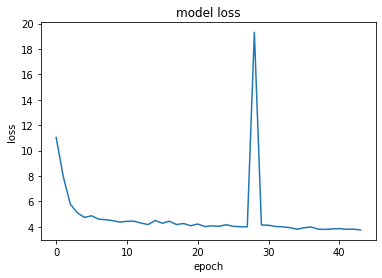

In [19]:
import matplotlib.pyplot as plt

k = 6

plt.plot(history.history['loss'][k:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [20]:
#aaa

tf.train.latest_checkpoint(checkpoint_dir)

model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 512)            2588160   
_________________________________________________________________
lstm_2 (LSTM)                (1, None, 1024)           6295552   
_________________________________________________________________
dropout_4 (Dropout)          (1, None, 1024)           0         
_________________________________________________________________
lstm_3 (LSTM)                (1, None, 1024)           8392704   
_________________________________________________________________
dropout_5 (Dropout)          (1, None, 1024)           0         
_________________________________________________________________
dense_3 (Dense)              (1, None, 512)            524800    
_________________________________________________________________
dropout_6 (Dropout)          (1, None, 512)           

## Generation

In [21]:
def generate_text(model, start_string, temperature = 0.5):
    # Evaluation step (generating text using the learned model)

    # Number of characters to generate
    num_generate = 300

    # Converting our start string to numbers (vectorizing)
    input_eval = [syl2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # Empty string to store our results
    text_generated = []

    # Low temperature results in more predictable text.
    # Higher temperature results in more surprising text.
    # Experiment to find the best setting.
    #temperature = 0.5
    #temperature = 1.0

    # Here batch size == 1
    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        #print(predictions)
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Pass the predicted character as the next input to the model
        # along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2syl[predicted_id])
    #print(loss_syllable(start_string + ''.join(text_generated)))
    #print(text_generated)
    return  text_generated

k = 0

start_string = []

for i in range(k,k+4):
  start_string = start_string + my_data3[i]

#start_string.reverse()
print('Seed: ')
print(''.join(start_string))
print()
#start_string=[' -start- ', 'nel',' ','mez','zo',' ','del',' ','cam','min',' ','di',' ','no','stra',' ','vi','ta',' -end- ']
#start_string=[' -start- ', 'che', ' ', 'non', ' ', 'di', 'rò', ' ', 'che', ' ', 'non', ' ', 'si', ' ', 'mo', ' ', 'non', ' ', 'vi', 'ne', ' -end- ']

generated = generate_text(model, start_string=start_string, temperature = 0.5)
print('Generated: ')
gen_reversed = generated
#gen_reversed.reverse()

#print(''.join(gen_reversed))
print(''.join(generated))
#print(generated[-1])

print([list(g) for k, g in groupby(generated, key=lambda x: x != "\n") if k][0])

Seed: 
=end_terzine=
 -start- itav strano di mincam del zomez nel -end- 
 -start- urascva osel nau per vaitrori mi -end- 
 -start- itarsmar rae via taritdi la chè -end- 


Generated: 
=end_terzine=
 -start- anip del niavea io com sìco e -end- 
 -start- ergav la da ròpe dogenguar sìco -end- 
 -start- agav più a più zionve le che doquan -end- 
=end_terzine=
 -start- isov si te se che tomen che è e -end- 
 -start- uram le de tolibe la de doquan -end- 
 -start- enev tosot con sì se tofat non che -end- 
=end_terzine=
 -start- idiv totut che quel di che temen la -end- 
 -start- uratre la su di temen la da e -end- 
 -start- essop si ca efo la de rae non che -end- 
=end_terzine=
 -start- iziatcia di me di che doquan meco -end- 
 -start- ogliav la te ti che che di che ròpe -end- 
 -start- alip si che che me da di doranbe -end- 
=end_terzine=
 -start- enterpa si che se tol al di te chè -end- 
 -start- antav la de se domon del ch io doquan -end- 
['=end_terzine=']


In [33]:
next = start_string[:-15]
print(''.join(next))
#seed = reverse(next)
seed = reverse([list(g) for k, g in groupby(reverse(next), key=lambda x: x != "\n") if k])


list_generated_verses = []

NUM_VERSES_TO_GENERATE = 152

TEMPERATURE = 0.7

print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

for y in range(NUM_VERSES_TO_GENERATE):
    #print([list(g) for k, g in groupby(next, key=lambda x: x != "\n") if k])
    head = [list(g) for k, g in groupby(next, key=lambda x: x != "\n") if k][-1]
    #print(head)
    
    su2 = [list(g) for k, g in groupby(next, key=lambda x: x != "\n") if k][-3]
    su1 = [list(g) for k, g in groupby(next, key=lambda x: x != "\n") if k][-2]
    #print(head[-1])

    #print('next')
    #print(next)
    #print('next')
    generated = generate_text(model, start_string = next, temperature = TEMPERATURE)
    generated = [list(g) for k, g in groupby(generated, key=lambda x: x != "\n") if k]

    if head == ['=end_terzine=']:
      next  = su2 + ['\n'] + su1 + ['\n']  + head + ['\n']
      next_print = reverse(su2) + ['\n'] + reverse(su1) + ['\n']  #+ reverse(head) + ['\n']

    else:
      next  = su2 + ['\n'] + su1 + ['\n']  + head
      next_print = reverse(su2) + ['\n'] + reverse(su1) + ['\n']  #+ reverse(head) 


    
    #generated[0].append('\n')
    #print('LLLLLLLLLLLLLLLL',generated[0])
    next = next + generated[0] + ['\n']
    #next_print =  next_print + reverse(generated[0]) + reverse(head) + ['\n']
    next_print =  reverse(generated[0]) + reverse(head) 


    

    if generated[1] == ['=end_terzine=']:
      next_print.append('\n')
      next_print.append('=end_terzine=')
      next_print.append('\n')

    list_generated_verses.append(next_print)


    #print('++++++++++++++++++++++++++++++++++')
    #print(''.join(reverse(next)))
    print(''.join(next_print))
    print('++++++++++++++++++++++++++++++++++')
    
    if generated[1] == ['=end_terzine=']:
      next.append('=end_terzine=')
      next.append('\n')
      next.append(' -start- ')
      next.append(su1[1])                     # QUI VA INSERITO OUTPUT RETE 2 CHE DA DUE SILLABE IN RIMA
      #next.append(su1[2])
      

    else:
      
      if su2 == ['=end_terzine=']:
        next.append(' -start- ')
        next.append(su1[1])                    # QUI VA INSERITO OUTPUT RETE 2 CHE DA DUE SILLABE IN RIMA
        #next.append(su1[2])
      else:
        next.append(' -start- ')
        #next.append(su2[1])

    
            

    #print(''.join(next))
    #print(next)

    #print('----------------------------')



=end_terzine=
 -start- itav strano di mincam del zomez nel -end- 
 -start- urascva osel nau per vaitrori mi -end- 
 -start- itarsmar
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
 -end- grato se se che perchè non smarrita -start- 
=end_terzine=

++++++++++++++++++++++++++++++++++
 -end- io credi vinta quanto de la mura -start- 
++++++++++++++++++++++++++++++++++
 -end- e da tanto là è che tatal porto -start- 
++++++++++++++++++++++++++++++++++
 -end- quando perchè lor sotta non col sura -start- 
=end_terzine=

++++++++++++++++++++++++++++++++++
 -end- docente la gentier ricenti corto -start- 
++++++++++++++++++++++++++++++++++
 -end- e già le compienza in chi si poco -start- 
++++++++++++++++++++++++++++++++++
 -end- ciascun tutdin sì che non che a porto -start- 
=end_terzine=

++++++++++++++++++++++++++++++++++
 -end- la genta la cui tu va che l mia moco -start- 
++++++++++++++++++++++++++++++++++
 -end- e per quel che di sua corno che pende -st

In [34]:
print('Seed: \n')
for i in range(len(seed)-1):
  print(''.join(seed[i]))
print('--------------------')
for i in range(len(list_generated_verses)):
  print(''.join(list_generated_verses[i]))

Seed: 

=end_terzine=
 -end- nel mezzo del cammin di nostra vita -start- 
 -end- mi ritrovai per una selva oscura -start- 
--------------------
 -end- grato se se che perchè non smarrita -start- 
=end_terzine=

 -end- io credi vinta quanto de la mura -start- 
 -end- e da tanto là è che tatal porto -start- 
 -end- quando perchè lor sotta non col sura -start- 
=end_terzine=

 -end- docente la gentier ricenti corto -start- 
 -end- e già le compienza in chi si poco -start- 
 -end- ciascun tutdin sì che non che a porto -start- 
=end_terzine=

 -end- la genta la cui tu va che l mia moco -start- 
 -end- e per quel che di sua corno che pende -start- 
 -end- e io che mi fagnomendo si poco -start- 
=end_terzine=

 -end- io sescia di per che da mi riprende -start- 
 -end- come viso quel che di suoi cammura -start- 
 -end- e assai si luce se si soccende -start- 
=end_terzine=

 -end- ma vite e e io così fummo cura -start- 
 -end- e quel vo te li sovra più mi spetta -start- 
 -end- quando sì che si

In [35]:
seed2 = seed[1:-1]

cleaned_generated_verses = copy.deepcopy(list_generated_verses)


cleaned_generated_verses = seed2 + cleaned_generated_verses 

for el in cleaned_generated_verses:
  if '=end_terzine=' in el:
    el.pop(-4)
    el.pop(-1)
    el.pop(-1)
  else:
    el.pop(-1)
  el.pop(0)

for i in range(len(cleaned_generated_verses)):
  cleaned_generated_verses[i].append('\n')
  cleaned_generated_verses[i] = ''.join(cleaned_generated_verses[i])


for i in range(len(list_generated_verses)):
  print(list_generated_verses[i])
  print(repr(cleaned_generated_verses[i]))
  print()

[' -end- ', 'gra', 'to', ' ', 'se', ' ', 'se', ' ', 'che', ' ', 'per', 'chè', ' ', 'non', ' ', 'smar', 'r', 'ita', ' -start- ', '\n', '=end_terzine=', '\n']
'nel mezzo del cammin di nostra vita\n'

[' -end- ', 'io', ' ', 'cre', 'di', ' ', 'vin', 'ta', ' ', 'quan', 'to', ' ', 'de', ' ', 'la', ' ', 'm', 'ura', ' -start- ']
'mi ritrovai per una selva oscura\n'

[' -end- ', 'e', ' ', 'da', ' ', 'tan', 'to', ' ', 'là', ' ', 'è', ' ', 'che', ' ', 'ta', 'tal', ' ', 'p', 'orto', ' -start- ']
'grato se se che perchè non smarrita\n\n'

[' -end- ', 'quan', 'do', ' ', 'per', 'chè', ' ', 'lor', ' ', 'sot', 'ta', ' ', 'non', ' ', 'col', ' ', 's', 'ura', ' -start- ', '\n', '=end_terzine=', '\n']
'io credi vinta quanto de la mura\n'

[' -end- ', 'do', 'cen', 'te', ' ', 'la', ' ', 'gen', 'tier', ' ', 'ri', 'cen', 'ti', ' ', 'c', 'orto', ' -start- ']
'e da tanto là è che tatal porto\n'

[' -end- ', 'e', ' ', 'già', ' ', 'le', ' ', 'com', 'pi', 'en', 'za in', ' ', 'chi', ' ', 'si', ' ', 'p', 'oco', ' -st

In [36]:
final_generated = ''.join([el for el in cleaned_generated_verses])
print(final_generated)

nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura
grato se se che perchè non smarrita

io credi vinta quanto de la mura
e da tanto là è che tatal porto
quando perchè lor sotta non col sura

docente la gentier ricenti corto
e già le compienza in chi si poco
ciascun tutdin sì che non che a porto

la genta la cui tu va che l mia moco
e per quel che di sua corno che pende
e io che mi fagnomendo si poco

io sescia di per che da mi riprende
come viso quel che di suoi cammura
e assai si luce se si soccende

ma vite e e io così fummo cura
e quel vo te li sovra più mi spetta
quando sì che si fatta de la cura

e colui di sè mentra per la getta
che mange se che riccia ti prilato
se si specchio mai sì de la vernetta

io mi minina mondo si ventato
e mi due se suo fatto non disperse
io dopora in ciatizia che mandato

io col sommo per la fin non comferse
de la culere perenivo giono
quelli cagine e non ostro diperse

e ciò disse da sè volare piono
in la nostra dilince de le risto
co

## Evaluation

In [26]:
#  VANNO CARICATI "main.py","metrics.py","rhyme.py","syllabification.py" dalla cartella "metrics"

In [37]:
from metrics import eval

eval(final_generated, divine_comedy)


io credi vinta quanto de la mura
e da tanto là è che tatal porto
quando perchè lor sotta non col sura

docente la gentier ricenti corto

Hendecasyllabicness: 1.0, Rhymeness: 1.0

docente la gentier ricenti corto
e già le compienza in chi si poco
ciascun tutdin sì che non che a porto

la genta la cui tu va che l mia moco

Hendecasyllabicness: 1.0, Rhymeness: 1.0

la genta la cui tu va che l mia moco
e per quel che di sua corno che pende
e io che mi fagnomendo si poco

io sescia di per che da mi riprende

Hendecasyllabicness: 1.0, Rhymeness: 1.0

io sescia di per che da mi riprende
come viso quel che di suoi cammura
e assai si luce se si soccende

ma vite e e io così fummo cura

Hendecasyllabicness: 1.0, Rhymeness: 1.0

ma vite e e io così fummo cura
e quel vo te li sovra più mi spetta
quando sì che si fatta de la cura

e colui di sè mentra per la getta

Hendecasyllabicness: 1.0, Rhymeness: 1.0

e colui di sè mentra per la getta
che mange se che riccia ti prilato
se si specchio mai sì d

In [38]:
import tensorflow_datasets as tfds

def ngrams_plagiarism(generated_text, original_text, n=4):
    # the tokenizer is used to remove non-alphanumeric symbols
    tokenizer = tfds.deprecated.text.Tokenizer()
    original_text = tokenizer.join(tokenizer.tokenize(original_text.lower()))
    generated_text_tokens = tokenizer.tokenize(generated_text.lower())

    total_ngrams = len(generated_text_tokens) - n + 1
    plagiarism_counter = 0

    for i in range(total_ngrams):
        ngram = tokenizer.join(generated_text_tokens[i:i+n])
        plagiarism_counter += 1 if ngram in original_text else 0
    return 1 - (plagiarism_counter / total_ngrams)

In [39]:
ngrams_plagiarism(final_generated, divine_comedy)

0.9965337954939342